# Elliptic Fourier Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from ktch.datasets import load_outline_mosquito_wings
from ktch.outline import EllipticFourierAnalysis

## Load mosquito wing outline dataset
from Rohlf and Archie 1984 _Syst. Zool._


In [5]:
data_outline_mosquito_wings = load_outline_mosquito_wings(as_frame=True)
data_outline_mosquito_wings.coords

x        y
specimen_id coord_id                  
1           0         0.99973  0.00000
            1         0.81881  0.05151
            2         0.70063  0.08851
            3         0.61179  0.11670
            4         0.53226  0.13666
...                       ...      ...
126         95        0.68167 -0.22149
            96        0.76135 -0.19548
            97        0.90752 -0.17312
            98        0.95720 -0.12093
            99        0.95964 -0.06038

[12600 rows x 2 columns]

In [6]:
coords = data_outline_mosquito_wings.coords.to_numpy().reshape(-1,100,2)

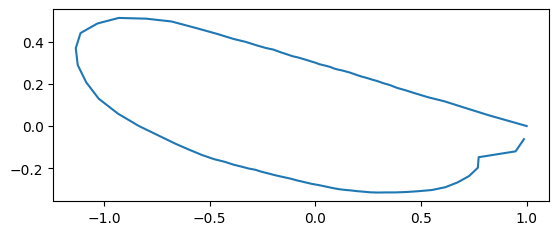

In [7]:
fig, ax = plt.subplots()
sns.lineplot(x=coords[0][:,0], y=coords[0][:,1], sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')

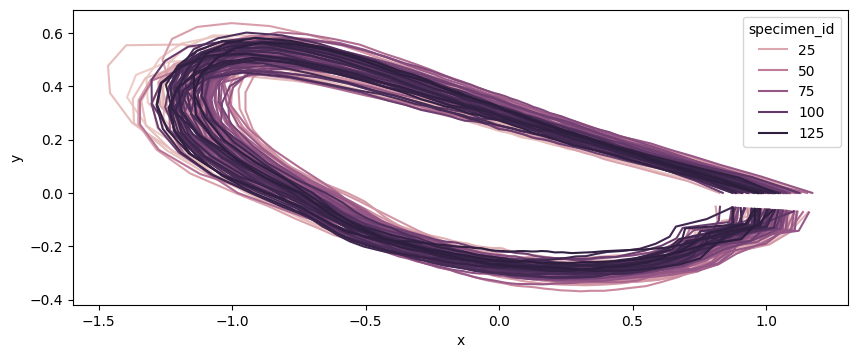

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(
    data= data_outline_mosquito_wings.coords,x="x", y="y",
    hue="specimen_id",
    sort= False,estimator=None,ax=ax)
ax.set_aspect('equal')

## EFA

In [8]:
efa = EllipticFourierAnalysis(n_harmonics=20)

In [9]:
coef = efa.fit_transform(coords)

## PCA

In [10]:
pca = PCA(n_components=12)
pcscores = pca.fit_transform(coef)

In [11]:
df_pca = pd.DataFrame(pcscores)
df_pca["specimen_id"] = [i for i in range(1,len(pcscores)+1)]
df_pca = df_pca.set_index("specimen_id")
df_pca = df_pca.join(data_outline_mosquito_wings.meta)
df_pca = df_pca.rename(columns={i:("PC"+str(i+1)) for i in range(12)})
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,genus
specimen_id,,,,,,,,,,,,,
1,-0.004277,-0.019211,0.018697,0.000810,0.001363,0.015705,-0.007489,0.000853,0.004332,-0.000064,0.001233,0.000509,AN
2,0.034207,0.019829,0.000914,0.002444,-0.004912,-0.004622,-0.002922,0.000719,0.008601,0.003872,0.002954,-0.000656,AN
3,0.199464,-0.031161,-0.045073,0.008504,0.004950,-0.006258,-0.001273,-0.004424,0.003027,0.000986,-0.002781,0.001875,AN
4,0.248697,0.035792,-0.019214,-0.000370,-0.007445,0.009597,-0.004925,-0.001945,-0.001729,0.001801,-0.001553,0.001683,AN
5,-0.151898,-0.057919,-0.009257,0.009022,-0.002941,-0.009306,-0.003443,0.001652,0.001026,0.004647,0.003179,-0.000502,AN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.084827,0.032089,-0.023891,0.000607,-0.007980,0.003300,-0.000688,-0.002950,-0.003434,0.001497,-0.002059,-0.000181,CX
123,0.096891,-0.043715,0.000709,-0.007439,0.005802,0.003579,-0.005781,-0.000594,-0.006692,-0.001221,0.000017,-0.001236,CX
124,0.119387,0.016518,-0.031522,-0.021842,-0.001695,-0.002130,-0.002902,-0.003965,-0.000240,0.001915,0.001795,-0.000932,CX


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

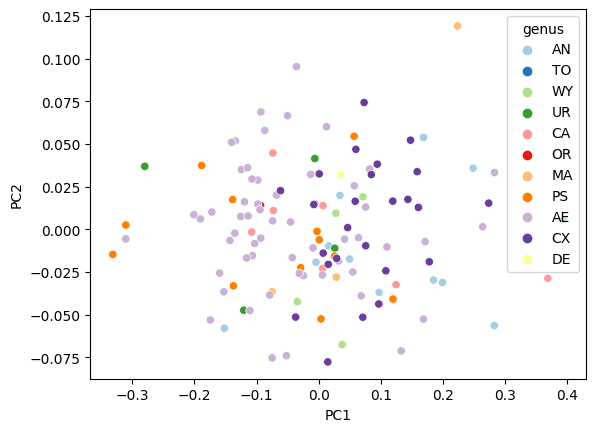

In [43]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x="PC1", y = "PC2", hue="genus", ax=ax, palette="Paired")

## Morphospace

In [44]:
def get_pc_scores_for_morphospace(ax, num = 5):
    xrange = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1],num)
    yrange = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1],num)
    return xrange, yrange

def plot_recon_morphs(pca, efa, hue, hue_order, fig, ax, 
             n_PCs_xy = [1, 2], lmax = 20, morph_num = 3, morph_scale = 1.0, morph_color = "lightgray", morph_alpha = 0.7, 
             standardized_by_1st_ellipsoid = False):
    
    pc_scores_h, pc_scores_v = get_pc_scores_for_morphospace(ax, morph_num)
    print("PC_h: ", pc_scores_h, ", PC_v: ", pc_scores_v)
    for pc_score_h in pc_scores_h:
        for pc_score_v in pc_scores_v:
            pc_score = np.zeros(pca.n_components_)
            n_PC_h, n_PC_v = n_PCs_xy
            pc_score[n_PC_h-1] = pc_score_h
            pc_score[n_PC_v-1] = pc_score_v

            arr_coef = pca.inverse_transform([pc_score])

            
            ax_width = ax.get_window_extent().width
            fig_width = fig.get_window_extent().width
            fig_height = fig.get_window_extent().height
            morph_size = morph_scale*ax_width/(fig_width*morph_num)
            loc = ax.transData.transform((pc_score_h, pc_score_v))
            axins = fig.add_axes([loc[0]/fig_width-morph_size/2, loc[1]/fig_height-morph_size/2,
                                       morph_size, morph_size], anchor='C')
            
            coords = efa.inverse_transform(arr_coef)
            x = coords[0][:,0]
            y = coords[0][:,1]
            
            axins.plot(x.astype(float),y.astype(float),color=morph_color, alpha = morph_alpha)
            axins.axis('equal')
            axins.axis('off') 


PC_h:  [-0.367795   -0.16809944  0.03159612  0.23129168  0.43098724] , PC_v:  [-0.08749144 -0.0333772   0.02073705  0.0748513   0.12896555]


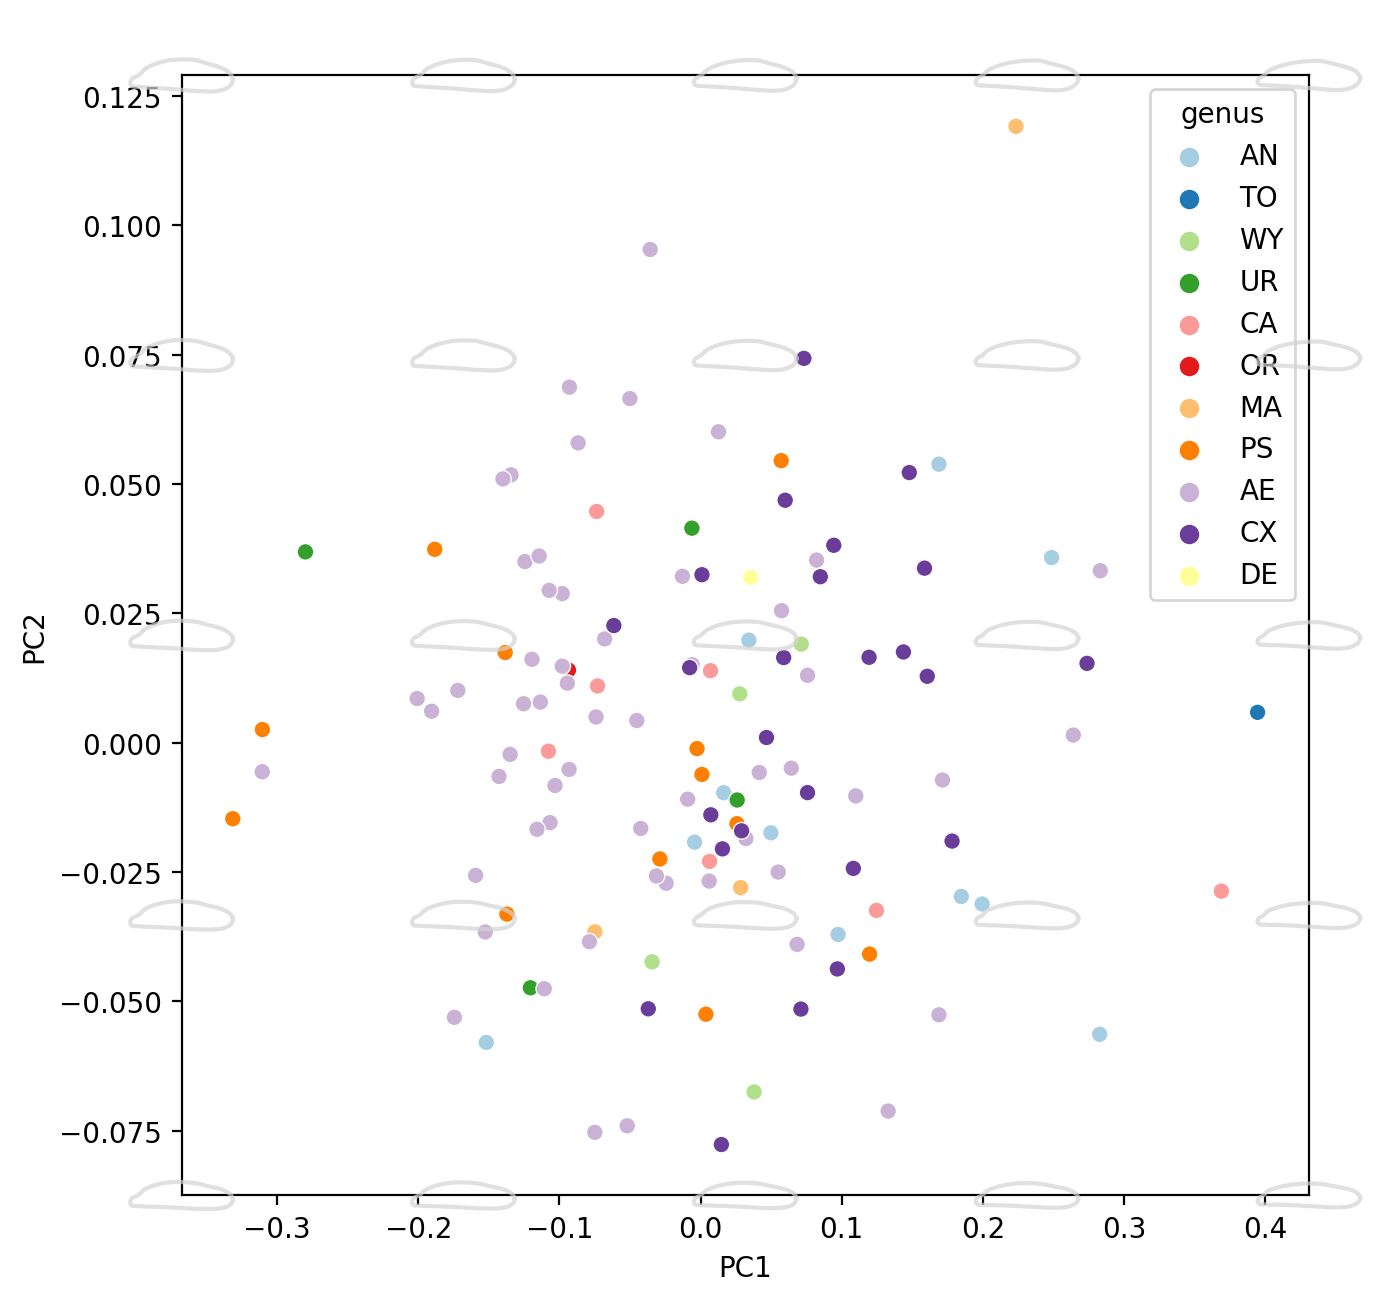

In [42]:
fig = plt.figure(figsize=(16,16),dpi=200)

ax = fig.add_subplot(2,2,1)
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="genus", hue_order=None, 
                palette="Paired", ax = ax, legend = True)

plot_recon_morphs(pca,efa,morph_num=5,morph_scale=0.5,
                  hue=None,hue_order=None, 
                  fig = fig, ax = ax)

PC_h:  [-0.367795   -0.16809944  0.03159612  0.23129168  0.43098724] , PC_v:  [-0.08749144 -0.0333772   0.02073705  0.0748513   0.12896555]
PC1-PC2 done
PC_h:  [-0.08749144 -0.0333772   0.02073705  0.0748513   0.12896555] , PC_v:  [-0.06424967 -0.0314274   0.00139486  0.03421713  0.0670394 ]
PC2-PC3 done
PC_h:  [-0.06424967 -0.0314274   0.00139486  0.03421713  0.0670394 ] , PC_v:  [-0.367795   -0.16809944  0.03159612  0.23129168  0.43098724]
PC3-PC1 done


<AxesSubplot: >

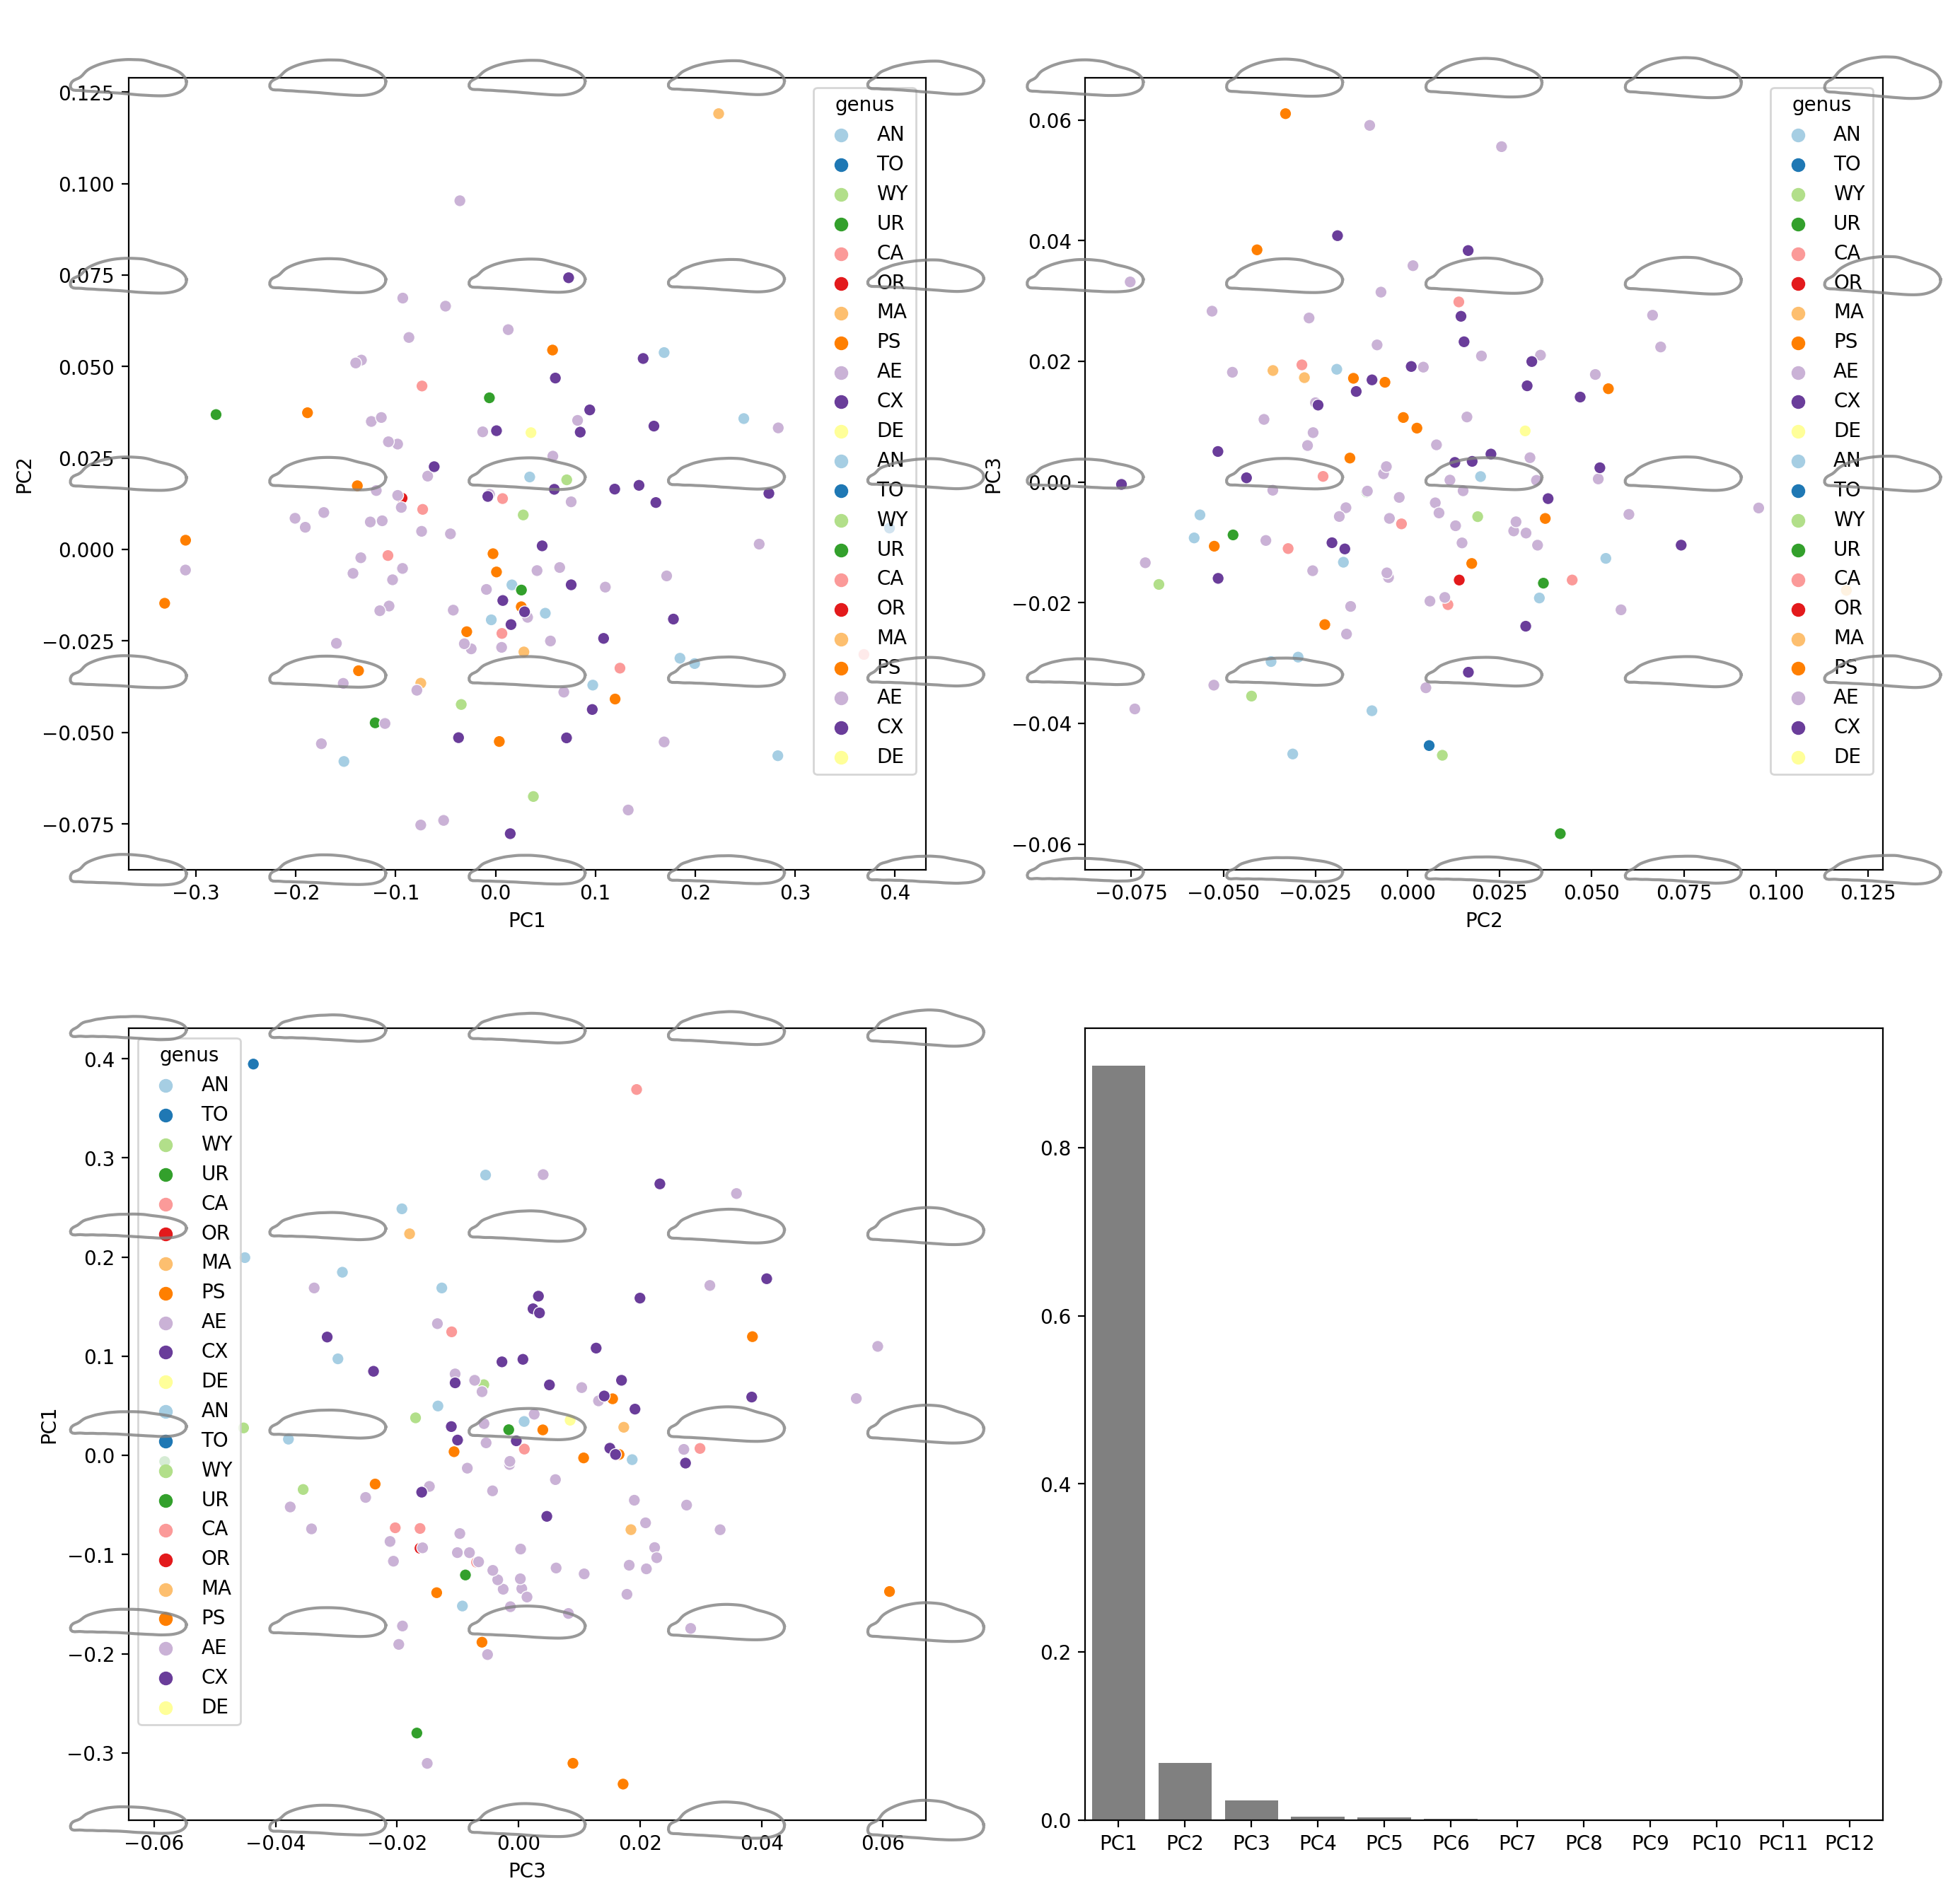

In [56]:
morph_num = 5
morph_scale = 0.8
morph_color = "gray"
morph_alpha = 0.8

fig = plt.figure(figsize=(16,16),dpi=200)

#########
# PC1
#########
ax = fig.add_subplot(2,2,1)
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="genus", hue_order=None, 
                palette="Paired", ax = ax, legend = True)

plot_recon_morphs(pca,efa,morph_num=5,morph_scale=morph_scale,
                  hue=None,hue_order=None, 
                  morph_color=morph_color, morph_alpha=morph_alpha,
                  fig = fig, ax = ax)

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="genus", hue_order=None, 
                palette="Paired", ax = ax)

ax.patch.set_alpha(0)
ax.set(xlabel='PC1', ylabel='PC2')

print("PC1-PC2 done")

#########
# PC2
#########
ax = fig.add_subplot(2,2,2)
sns.scatterplot(data=df_pca, x="PC2", y="PC3", hue="genus", hue_order=None, 
                palette="Paired", ax = ax, legend = True)

plot_recon_morphs(pca,efa,morph_num=5,morph_scale=morph_scale,
                  hue=None,hue_order=None, 
                  morph_color=morph_color, morph_alpha=morph_alpha,
                  fig = fig, ax = ax, n_PCs_xy = [2, 3])

sns.scatterplot(data=df_pca, x="PC2", y="PC3", hue="genus", hue_order=None, 
                palette="Paired", ax = ax)

ax.patch.set_alpha(0)
ax.set(xlabel='PC2', ylabel='PC3')

print("PC2-PC3 done")

#########
# PC3
#########
ax=fig.add_subplot(2,2,3)
sns.scatterplot(data=df_pca, x="PC3", y="PC1", hue="genus", hue_order=None, 
                palette="Paired", ax = ax, legend = True)

plot_recon_morphs(pca,efa,morph_num=5,morph_scale=morph_scale,
                  hue=None,hue_order=None, 
                  morph_color=morph_color, morph_alpha=morph_alpha,
                  fig = fig, ax = ax, n_PCs_xy = [3, 1])

sns.scatterplot(data=df_pca, x="PC3", y="PC1", hue="genus", hue_order=None, 
                palette="Paired", ax = ax)

ax.patch.set_alpha(0)
ax.set(xlabel='PC3', ylabel='PC1')

print("PC3-PC1 done")

#########
# CCR
#########

fig.add_subplot(2,2,4)
sns.barplot(x=["PC"+str(i+1) for i in range(12)], y=pca.explained_variance_ratio_[0:16], color="gray")